<a href="https://colab.research.google.com/github/hmarinoo/chess-system-java/blob/master/mba_tendencia_central.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Medidas de tendência central

## Média

In [ ]:
import pandas as pd

data = {'nome': ['João', 'André', 'Maria', 'Ana', 'Marcela', 'Joana', 'Paulo'],
        'salario': [29500, 32500, 30500, 27500, 35500, 35500, 26000]}

df = pd.DataFrame(data)

print(df)


      nome  salario
0     João    29500
1    André    32500
2    Maria    30500
3      Ana    27500
4  Marcela    35500
5    Joana    35500
6    Paulo    26000


### Força bruta

In [ ]:
soma = 29500 + 32500 + 30500 + 27500 + 35500 + 35500 + 26000
print(soma)

217000


In [ ]:
media_salario = soma / 7
print(media_salario)

31000.0


### Iteração

In [ ]:
soma = 0
for valor in df['salario']:
  soma += valor

media_salario = soma / len(df['salario'])

print(media_salario)


31000.0


### Pandas

In [ ]:
media_salario = df['salario'].mean()
print(media_salario)


31000.0


E se adicionarmos um jogador de futebol?

In [ ]:
neymar = {'nome': 'Neymar', 'salario': 1000000}
df_milionario = pd.concat([df, pd.DataFrame([neymar])], ignore_index=True)
print(df_milionario)


      nome  salario
0     João    29500
1    André    32500
2    Maria    30500
3      Ana    27500
4  Marcela    35500
5    Joana    35500
6    Paulo    26000
7   Neymar  1000000


In [ ]:
media_salario_milionario = df_milionario['salario'].mean()
print(media_salario_milionario)

152125.0


E se adicionarmos um jogador de futebol mediano e reduzirmos os salários dos demais?

In [ ]:
data2 = {'nome': ['João', 'André', 'Maria', 'Ana', 'Marcela', 'Joana', 'Paulo'],
        'salario': [200000,	4366.12,	3591.23,	3332.33,	1303.55,	2073.44,	2333.33]}

df2 = pd.DataFrame(data2)

print(df2)


      nome    salario
0     João  200000.00
1    André    4366.12
2    Maria    3591.23
3      Ana    3332.33
4  Marcela    1303.55
5    Joana    2073.44
6    Paulo    2333.33


In [ ]:
df2['salario'].mean()

30999.999999999996

## Mediana

In [ ]:
salarios_ordenados = sorted(df['salario'])
salarios_ordenados

[26000, 27500, 29500, 30500, 32500, 35500, 35500]

In [ ]:
tamanho_lista = len(salarios_ordenados)
print(tamanho_lista)

7


In [ ]:
if tamanho_lista % 2 == 0:
  indice_meio1 = tamanho_lista // 2 - 1
  indice_meio2 = tamanho_lista // 2
  mediana = (salarios_ordenados[indice_meio1] + salarios_ordenados[indice_meio2]) / 2
else:
  indice_meio = tamanho_lista // 2
  mediana = salarios_ordenados[indice_meio]

print(mediana)

30500


In [ ]:
mediana_salario = df['salario'].median()
print(mediana_salario)


30500.0


E a mediana dos salários com o Neymar?

In [ ]:
mediana_salario_milionario = df_milionario['salario'].median()
print(mediana_salario_milionario)


31500.0


In [ ]:
salarios_milionario_ordenados = sorted(df_milionario['salario'])
salarios_milionario_ordenados

[26000, 27500, 29500, 30500, 32500, 35500, 35500, 1000000]

In [ ]:
(30500 + 32500)/2

31500.0

## Moda

In [ ]:
frequencia_salario = df['salario'].value_counts()
frequencia_salario

,count
salario,
35500,2
29500,1
32500,1
30500,1
27500,1
26000,1


In [ ]:
primeiro_elemento = frequencia_salario.iloc[0]
indice_primeiro_elemento = frequencia_salario.index[0]

print(primeiro_elemento)
print(indice_primeiro_elemento)


2
35500


In [ ]:
moda_salario = df['salario'].mode()
moda_salario


,salario
0,35500


## Média ponderada

Considere agora o seguinte conjunto de dados:

In [ ]:
data_freq = {'frequencia': [4, 2, 3, 2, 1, 1],
        'salario': [29500, 32500, 30500, 27500, 35500, 26000]}

df_freq = pd.DataFrame(data_freq)
print(df_freq)


   frequencia  salario
0           4    29500
1           2    32500
2           3    30500
3           2    27500
4           1    35500
5           1    26000


In [ ]:
df_freq['salario'].mean()

30250.0

In [ ]:
soma_produto = 0
soma_pesos = 0

for index, row in df_freq.iterrows():
  soma_produto += row['salario'] * row['frequencia']
  soma_pesos += row['frequencia']

media_ponderada = soma_produto / soma_pesos
print(media_ponderada)


30076.923076923078


In [ ]:
media_ponderada = (df_freq['salario'] * df_freq['frequencia']).sum() / df_freq['frequencia'].sum()
media_ponderada

30076.923076923078

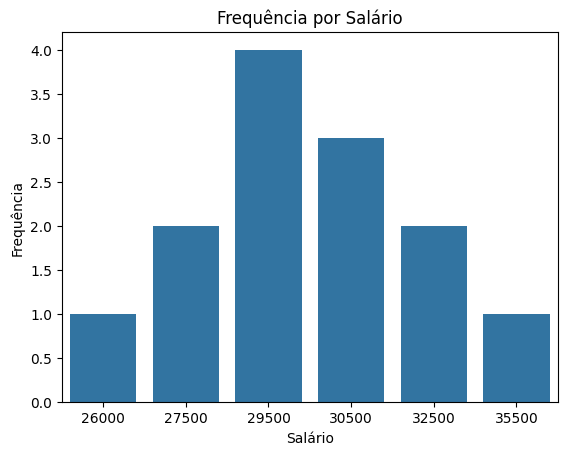

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

df_freq_sorted = df_freq.sort_values('salario')

sns.barplot(x='salario', y='frequencia', data=df_freq_sorted)

plt.xlabel('Salário')
plt.ylabel('Frequência')
plt.title('Frequência por Salário')

plt.show()


## Exercícios

Com os dados em mtcars, calcule:

1.   Média de mpg
2.   Mediana de mpg
3. Moda de cyl



In [ ]:
!pip install pydataset

from pydataset import data
mtcars = data('mtcars')
mtcars

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


# Dispersão

## Desvio absoluto médio

In [ ]:
media_salario = df['salario'].mean()

desvios_absolutos = abs(df['salario'] - media_salario)

desvio_absoluto_medio = desvios_absolutos.mean()

print(desvio_absoluto_medio)


3000.0


## Variância

In [ ]:
media_salario = df['salario'].mean()
soma_quadrados_diferencas = 0
for salario in df['salario']:
  diferenca = salario - media_salario
  soma_quadrados_diferencas += diferenca ** 2

variancia_salario = soma_quadrados_diferencas / (len(df['salario']) - 1)
print(variancia_salario)


13750000.0


In [ ]:
variancia_salario = df['salario'].var()
print(variancia_salario)

13750000.0


E qual a variância de df2?

In [ ]:
df2['salario'].var()

5554584530.820201

## Desvio padrão

In [ ]:
# prompt: calcule o desvio padrão de df['salario'] usando raiz quadrada da variancia calculada acima

desvio_padrao_salario = variancia_salario**0.5
print(desvio_padrao_salario)


3708.0992435478315


In [ ]:
import math

desvio_padrao_salario = math.sqrt(variancia_salario)
print(desvio_padrao_salario)

3708.0992435478315


In [ ]:
desvio_padrao_salario = df['salario'].std()
print(desvio_padrao_salario)


3708.0992435478315


In [ ]:
desvio_padrao_salario_milionario = df_milionario['salario'].std()
print(desvio_padrao_salario_milionario)

342610.43579302385


In [ ]:
df2['salario'].std()

74529.08513339072

## Coeficiente de variação

In [ ]:
cv = desvio_padrao_salario/media_salario
print(cv)

0.1196161046305752


In [ ]:
cv_milionario = df_milionario['salario'].std()/media_salario_milionario
print(cv_milionario)

2.252163916470165


In [ ]:
cv_df2 = df2['salario'].std()/df2['salario'].mean()
print(cv_df2)

2.4041640365609913


# Exercícios

Calcule a variância e  desvio padrão e cv de mpg e compare com o cv de hp.

# Covariância correlação

## Covariância

In [ ]:
media_mpg = mtcars['mpg'].mean()
media_hp = mtcars['hp'].mean()

n = len(mtcars)
soma_produto_desvios = 0

for i in range(n):
  desvio_mpg = mtcars['mpg'][i] - media_mpg
  desvio_hp = mtcars['hp'][i] - media_hp
  soma_produto_desvios += desvio_mpg * desvio_hp

covar_mpg_hp_manual = soma_produto_desvios / (n - 1)

print(covar_mpg_hp_manual)


-320.7320564516129


<ipython-input-94-766fec0b8186>:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  desvio_mpg = mtcars['mpg'][i] - media_mpg
<ipython-input-94-766fec0b8186>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  desvio_hp = mtcars['hp'][i] - media_hp


In [ ]:
covar_mpg_hp = mtcars['mpg'].cov(mtcars['hp'])
print(covar_mpg_hp)


-320.7320564516129


In [ ]:
covar_mpg_hp = mtcars['mpg'].cov(mtcars['wt'])
print(covar_mpg_hp)

-5.1166846774193555


In [ ]:
# prompt: calcule a matriz de covariancia entre as variaveis numericas de mtcars

mtcars.cov()


,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
mpg,36.324103,-9.172379,-633.097208,-320.732056,2.195064,-5.116685,4.509149,2.017137,1.803931,2.135685,-5.363105
cyl,-9.172379,3.189516,199.660282,101.931452,-0.668367,1.367371,-1.886855,-0.729839,-0.465726,-0.649194,1.520161
disp,-633.097208,199.660282,15360.799829,6721.158669,-47.064019,107.684204,-96.051681,-44.377621,-36.564012,-50.802621,79.068750
hp,-320.732056,101.931452,6721.158669,4700.866935,-16.451109,44.192661,-86.770081,-24.987903,-8.320565,-6.358871,83.036290
drat,2.195064,-0.668367,-47.064019,-16.451109,0.285881,-0.372721,0.087141,0.118649,0.190151,0.275988,-0.078407
wt,-5.116685,1.367371,107.684204,44.192661,-0.372721,0.957379,-0.305482,-0.273661,-0.338105,-0.421081,0.675790
qsec,4.509149,-1.886855,-96.051681,-86.770081,0.087141,-0.305482,3.193166,0.670565,-0.204960,-0.280403,-1.894113
vs,2.017137,-0.729839,-44.377621,-24.987903,0.118649,-0.273661,0.670565,0.254032,0.042339,0.076613,-0.463710
am,1.803931,-0.465726,-36.564012,-8.320565,0.190151,-0.338105,-0.204960,0.042339,0.248992,0.292339,0.046371
gear,2.135685,-0.649194,-50.802621,-6.358871,0.275988,-0.421081,-0.280403,0.076613,0.292339,0.544355,0.326613


## Correlação

In [ ]:
# prompt: calcule a agora a correlação entre mpg e hp, sem usar o método corr

desvio_padrao_mpg = mtcars['mpg'].std()
desvio_padrao_hp = mtcars['hp'].std()

correlacao_mpg_hp = covar_mpg_hp / (desvio_padrao_mpg * desvio_padrao_hp)
print(correlacao_mpg_hp)


-0.012382325792937283


In [ ]:
mtcars.corr()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
mpg,1.000000,-0.852162,-0.847551,-0.776168,0.681172,-0.867659,0.418684,0.664039,0.599832,0.480285,-0.550925
cyl,-0.852162,1.000000,0.902033,0.832447,-0.699938,0.782496,-0.591242,-0.810812,-0.522607,-0.492687,0.526988
disp,-0.847551,0.902033,1.000000,0.790949,-0.710214,0.887980,-0.433698,-0.710416,-0.591227,-0.555569,0.394977
hp,-0.776168,0.832447,0.790949,1.000000,-0.448759,0.658748,-0.708223,-0.723097,-0.243204,-0.125704,0.749812
drat,0.681172,-0.699938,-0.710214,-0.448759,1.000000,-0.712441,0.091205,0.440278,0.712711,0.699610,-0.090790
wt,-0.867659,0.782496,0.887980,0.658748,-0.712441,1.000000,-0.174716,-0.554916,-0.692495,-0.583287,0.427606
qsec,0.418684,-0.591242,-0.433698,-0.708223,0.091205,-0.174716,1.000000,0.744535,-0.229861,-0.212682,-0.656249
vs,0.664039,-0.810812,-0.710416,-0.723097,0.440278,-0.554916,0.744535,1.000000,0.168345,0.206023,-0.569607
am,0.599832,-0.522607,-0.591227,-0.243204,0.712711,-0.692495,-0.229861,0.168345,1.000000,0.794059,0.057534
gear,0.480285,-0.492687,-0.555569,-0.125704,0.699610,-0.583287,-0.212682,0.206023,0.794059,1.000000,0.274073


<Axes: >

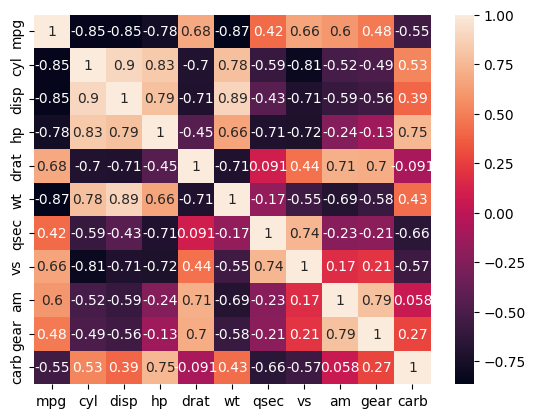

In [ ]:
sns.heatmap(mtcars.corr(), annot=True)

# Exercícios

Calcule a covariância e correlação entre as variáveis numéricas de diamonds.

#Visualização

## Dispersão

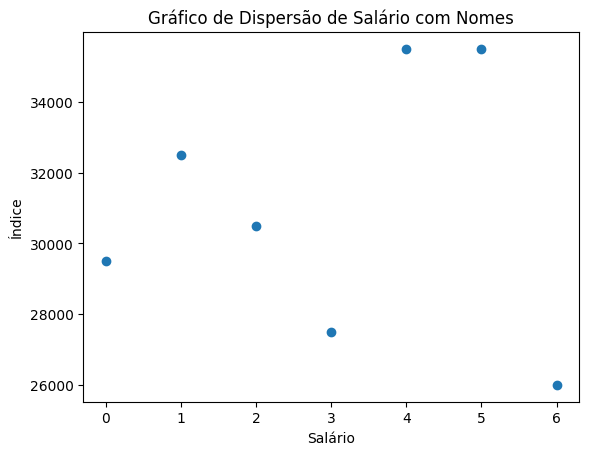

In [ ]:
import matplotlib.pyplot as plt

plt.scatter([i for i in range(len(df['salario']))], df['salario'], )

plt.xlabel('Salário')
plt.ylabel('Índice')
plt.title('Gráfico de Dispersão de Salário com Nomes')
plt.show()


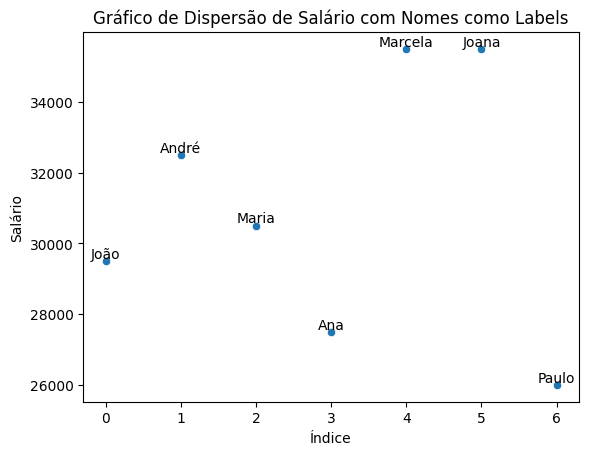

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x=df.index, y='salario', data=df)

for i in range(len(df)):
  plt.text(i, df['salario'][i], df['nome'][i], ha='center', va='bottom')

plt.xlabel('Índice')
plt.ylabel('Salário')
plt.title('Gráfico de Dispersão de Salário com Nomes como Labels')

plt.show()


In [ ]:
diamonds = data('diamonds')
diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


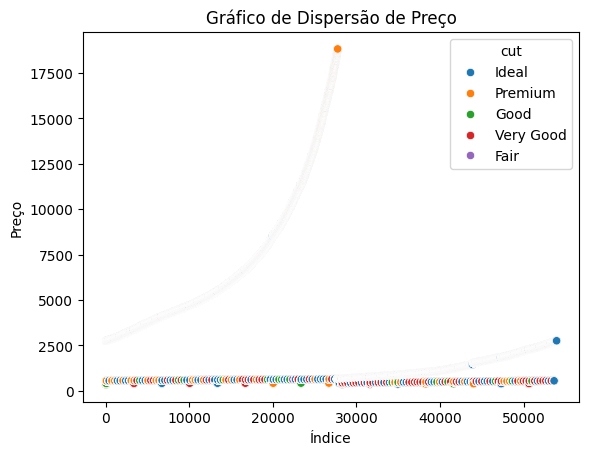

In [ ]:
import matplotlib.pyplot as plt
sns.scatterplot(x=diamonds.index, y='price', data=diamonds, hue='cut')
plt.xlabel('Índice')
plt.ylabel('Preço')
plt.title('Gráfico de Dispersão de Preço')
plt.show()

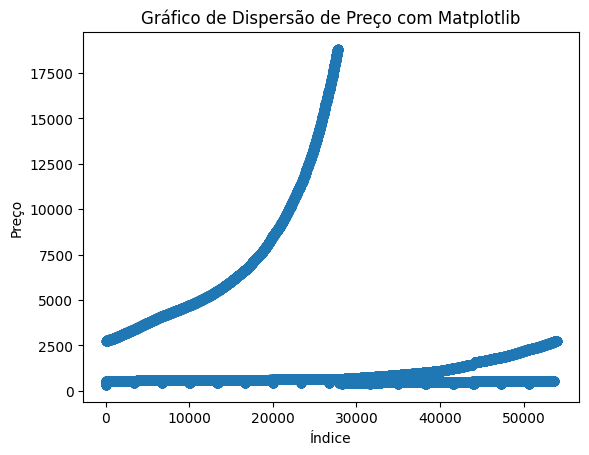

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(diamonds.index, diamonds['price'])
plt.xlabel('Índice')
plt.ylabel('Preço')
plt.title('Gráfico de Dispersão de Preço com Matplotlib')
plt.show()


In [ ]:
iris = data('iris')
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


<Axes: xlabel='None', ylabel='Sepal.Width'>

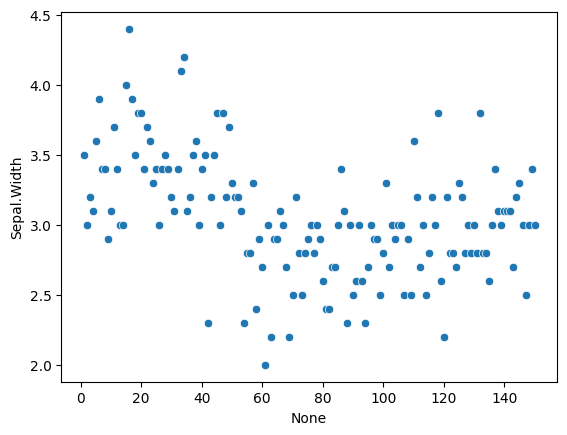

In [ ]:
sns.scatterplot(x=iris.index, y='Sepal.Width', data=iris)

<Axes: xlabel='None', ylabel='Sepal.Width'>

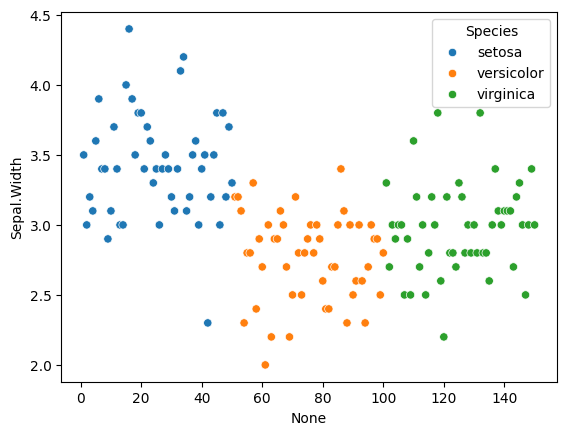

In [ ]:
sns.scatterplot(x=iris.index, y='Sepal.Width', data=iris, hue='Species')

<Axes: xlabel='Sepal.Length', ylabel='Sepal.Width'>

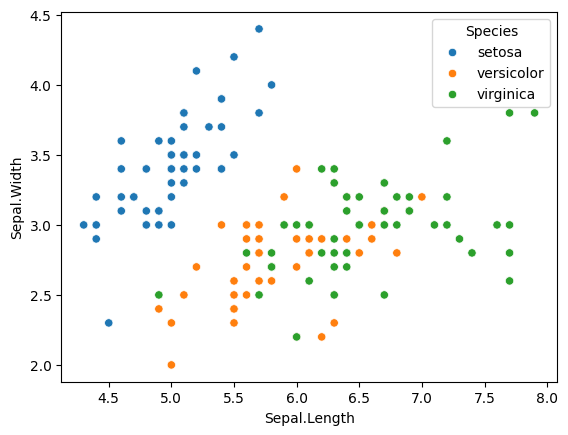

In [ ]:
sns.scatterplot(x='Sepal.Length', y='Sepal.Width', data=iris, hue='Species')

# Barra ou coluna

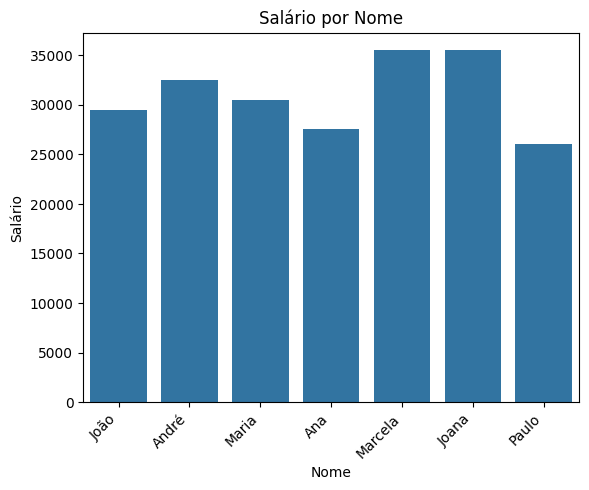

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x='nome', y='salario', data=df)
plt.xlabel('Nome')
plt.ylabel('Salário')
plt.title('Salário por Nome')
plt.xticks(rotation=45, ha='right')  # Rotacionar rótulos do eixo x para melhor legibilidade
plt.show()


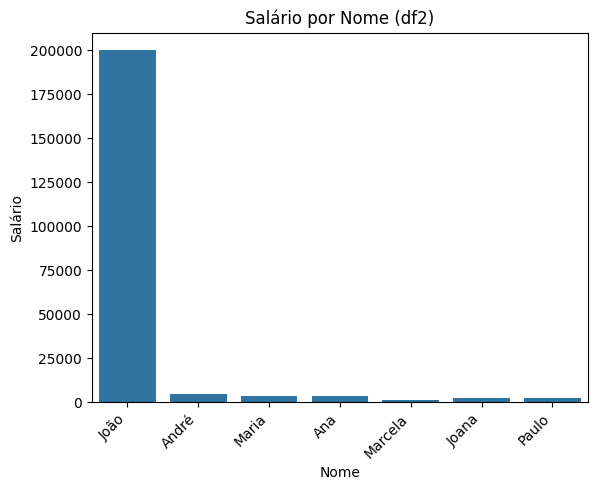

In [ ]:
sns.barplot(x='nome', y='salario', data=df2)
plt.xlabel('Nome')
plt.ylabel('Salário')
plt.title('Salário por Nome (df2)')
plt.xticks(rotation=45, ha='right')  # Rotacionar rótulos do eixo x para melhor legibilidade
plt.show()


## Histograma

### Variáveis categóricas

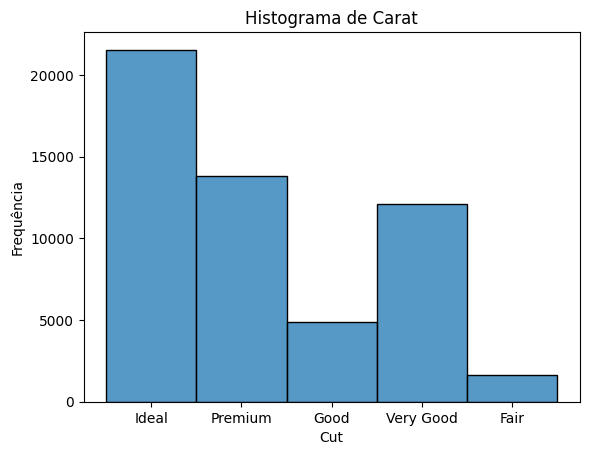

In [ ]:
import matplotlib.pyplot as plt
sns.histplot(diamonds['cut'])
plt.xlabel('Cut')
plt.ylabel('Frequência')
plt.title('Histograma de Carat')
plt.show()

### Variáveis numéricas

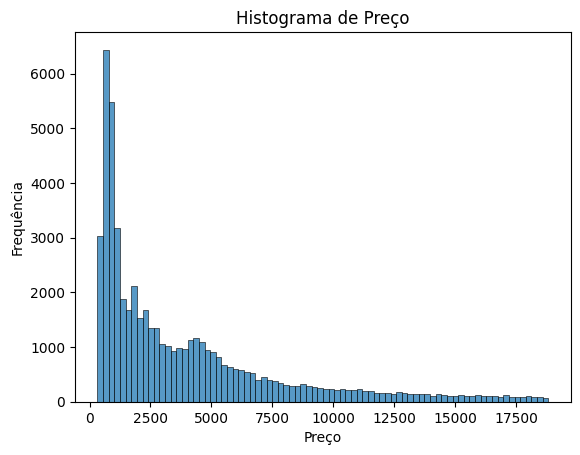

In [ ]:
sns.histplot(diamonds['price'])
plt.xlabel('Preço')
plt.ylabel('Frequência')
plt.title('Histograma de Preço')
plt.show()

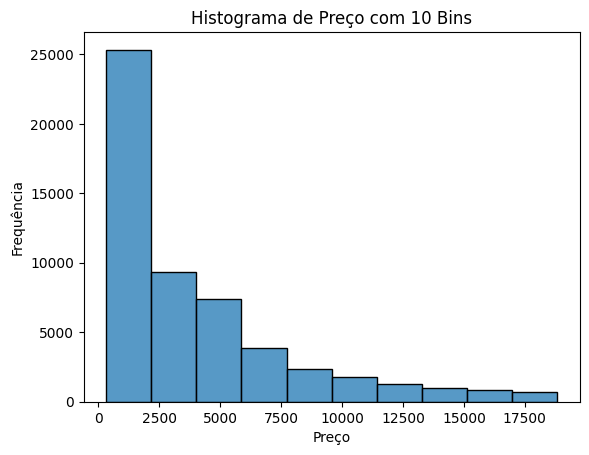

In [ ]:
sns.histplot(diamonds['price'], bins=10)
plt.xlabel('Preço')
plt.ylabel('Frequência')
plt.title('Histograma de Preço com 10 Bins')
plt.show()


## Tabela de frequência

In [ ]:
# prompt: faça uma tabela de frequencia com diamonds['price'] com 10 bins

import pandas as pd

# Criando a tabela de frequência com 10 bins
freq_table = pd.cut(diamonds['price'], bins=10).value_counts().sort_index()

# Imprimindo a tabela de frequência
print(freq_table)


price
(307.503, 2175.7]     25335
(2175.7, 4025.4]       9328
(4025.4, 5875.1]       7393
(5875.1, 7724.8]       3878
(7724.8, 9574.5]       2364
(9574.5, 11424.2]      1745
(11424.2, 13273.9]     1306
(13273.9, 15123.6]     1002
(15123.6, 16973.3]      863
(16973.3, 18823.0]      726
Name: count, dtype: int64


## Linha

In [ ]:
air_passengers = data('AirPassengers')
air_passengers.head()

,time,AirPassengers
1,1949.000000,112
2,1949.083333,118
3,1949.166667,132
4,1949.250000,129
5,1949.333333,121


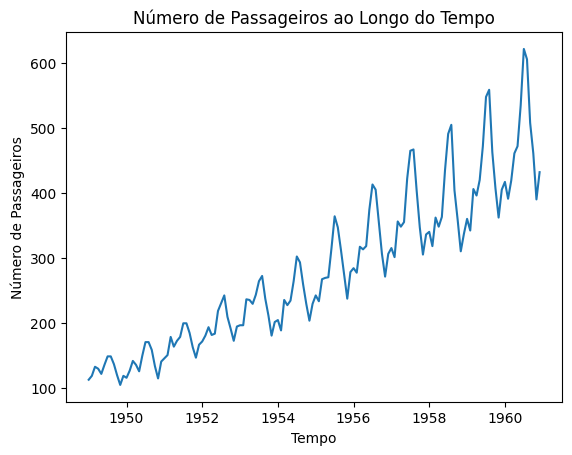

In [ ]:
import matplotlib.pyplot as plt
sns.lineplot(x='time', y='AirPassengers', data=air_passengers)
plt.xlabel('Tempo')
plt.ylabel('Número de Passageiros')
plt.title('Número de Passageiros ao Longo do Tempo')
plt.show()


## Torta

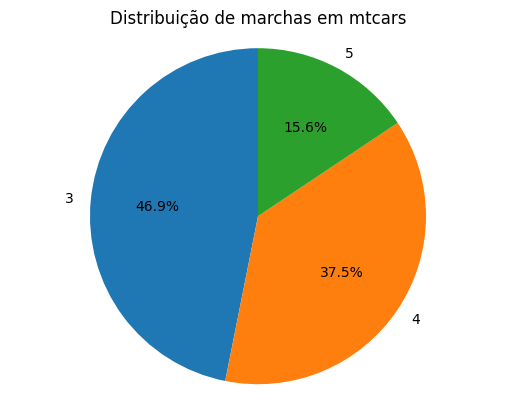

In [ ]:
gears_counts = mtcars['gear'].value_counts()

plt.pie(gears_counts, labels=gears_counts.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Distribuição de marchas em mtcars')
plt.show()

##Boxplot

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


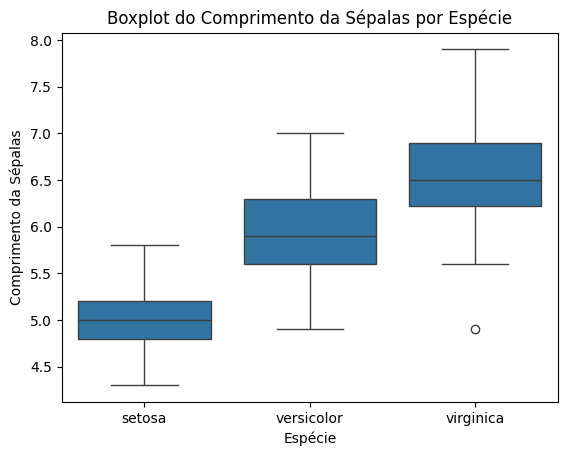

In [ ]:
import matplotlib.pyplot as plt
sns.boxplot(x='Species', y='Sepal.Length', data=iris)
plt.xlabel('Espécie')
plt.ylabel('Comprimento da Sépalas')
plt.title('Boxplot do Comprimento da Sépalas por Espécie')
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


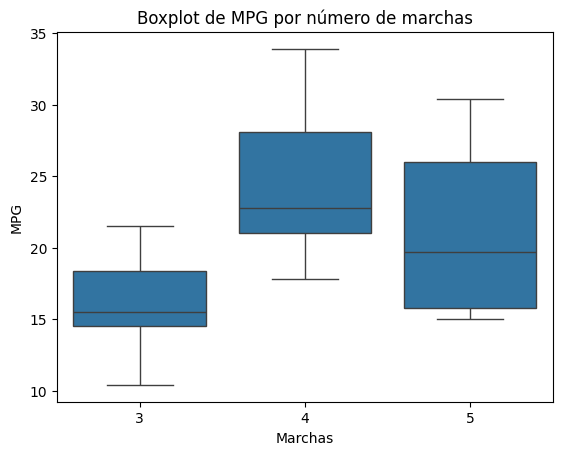

In [ ]:
import matplotlib.pyplot as plt
sns.boxplot(x='gear', y='mpg', data=mtcars)
plt.xlabel('Marchas')
plt.ylabel('MPG')
plt.title('Boxplot de MPG por número de marchas')
plt.show()
